## Load APIs

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier

## Defined Functions

In [2]:
# function for a scatter plot with labels
def plot_scatter(X, y, ax=None):
    if ax is None:
        ax = plt.gca()
    for label, marker, color in zip(np.unique(y), ['o', '^'], ['b', 'r']):
        ax.scatter(X[y==label, 0], X[y==label, 1], marker=marker, c=color, edgecolors='black', s=40, label=f'Class {label}')

In [3]:
def plot_2d_separator(model, X, padding, h, ax=None):
    if ax is None:
        ax = plt.gca()
    
    x1_min, x1_max = X[:,0].min() - padding, X[:,0].max() + padding 
    x2_min, x2_max = X[:,1].min() - padding, X[:,1].max() + padding
    # print(x1_min, x1_max, x2_min, x2_max)

    xx, yy = np.meshgrid(
        np.linspace(x1_min, x1_max, h),
        np.linspace(x2_min, x2_max, h)
    )
    # print(xx.shape, yy.shape)

    grid = np.c_[xx.ravel(), yy.ravel()]
    # print(grid.shape)

    Z_clf = model.predict(grid).reshape(xx.shape)

    ax.contourf(xx, yy, Z_clf, alpha=0.3, cmap='coolwarm')

    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max) 

## Neural Networks

### Multilayer Perceptrons

#### Default parameters

In [5]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [6]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

Text(0, 0.5, 'Feature 1')

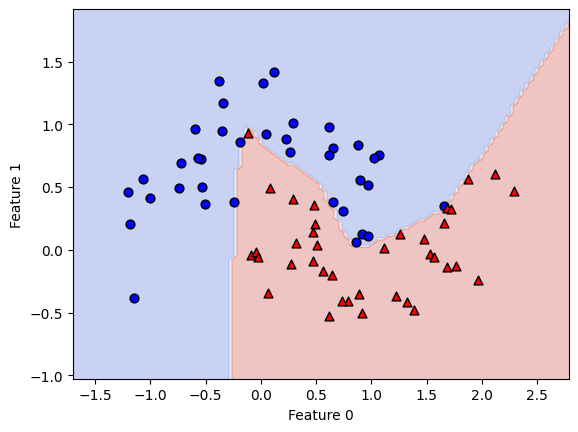

In [7]:
plot_2d_separator(mlp, X_train, 0.5, 100)
plot_scatter(X_train, y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

#### Reduced hidden layer size

c:\Users\akuka\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

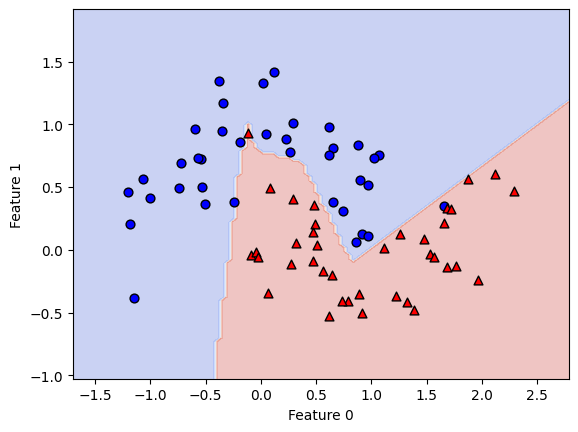

In [8]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)

plot_2d_separator(mlp, X_train, 0.5, 100)
plot_scatter(X_train, y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

#### Two hidden layers

two hidden layers, with 10 units each

Text(0, 0.5, 'Feature 1')

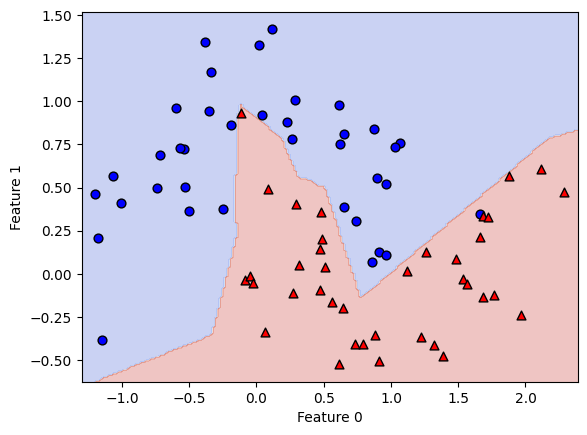

In [13]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)

plot_2d_separator(mlp, X_train, 0.1, 200)
plot_scatter(X_train, y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

#### tanh nonlinearity

using two hidden layers, with 10 units each, and tanh nonlinearity

Text(0, 0.5, 'Feature 1')

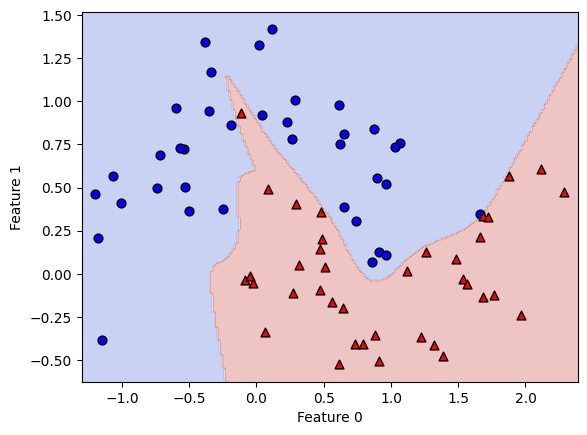

In [15]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10], max_iter= 500)
mlp.fit(X_train, y_train)

plot_2d_separator(mlp, X_train, 0.1, 200)
plot_scatter(X_train, y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

#### Analyzing setting alpha

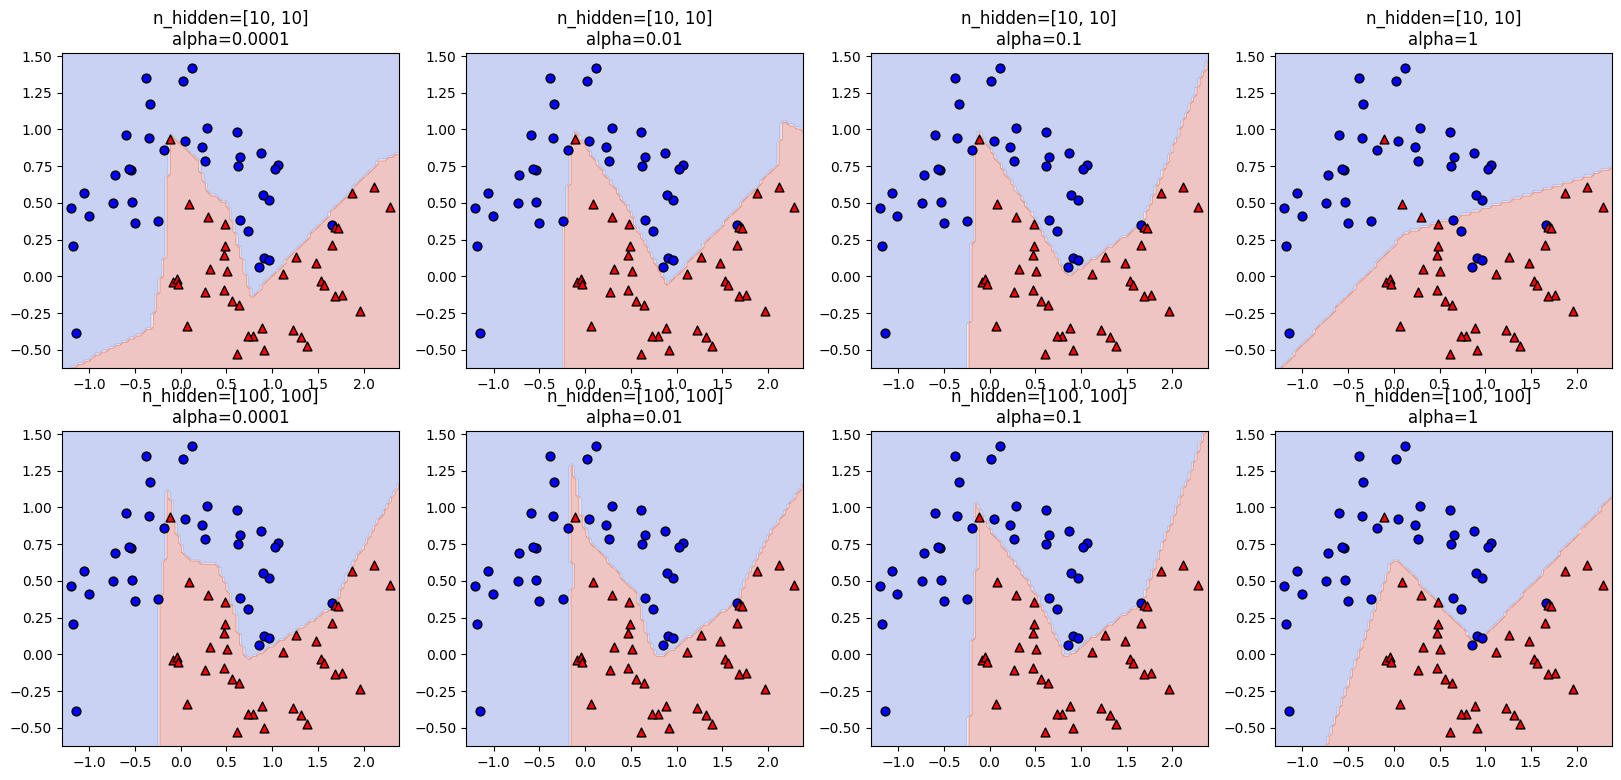

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(20, 9))

for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha, max_iter=500)
        mlp.fit(X_train, y_train)
        plot_2d_separator(mlp, X_train, .1, 100, ax=ax)
        plot_scatter(X_train, y_train, ax=ax)
        ax.set_title(f'n_hidden=[{n_hidden_nodes}, {n_hidden_nodes}]\nalpha={alpha}')

## MLPs on cancer dataset

### Preparing Data

In [18]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [21]:
print(f'Cancer data per feature maxima:\n{cancer['data'].max(axis=0)}')

Cancer data per feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

### MLP with default parameters

In [23]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


### Standard Scaling data

In [24]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)
X_train_scaled = (X_train - mean_on_train) / std_on_train

X_test_scaled = (X_test - mean_on_train) / std_on_train

### MLP on scaled data

In [27]:
mlp = MLPClassifier(random_state=42, max_iter=300)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


### Decrease model complexity

In [28]:
mlp = MLPClassifier(random_state=42, max_iter=300, alpha=1)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.986
Accuracy on test set: 0.979


### Analyzing model weights

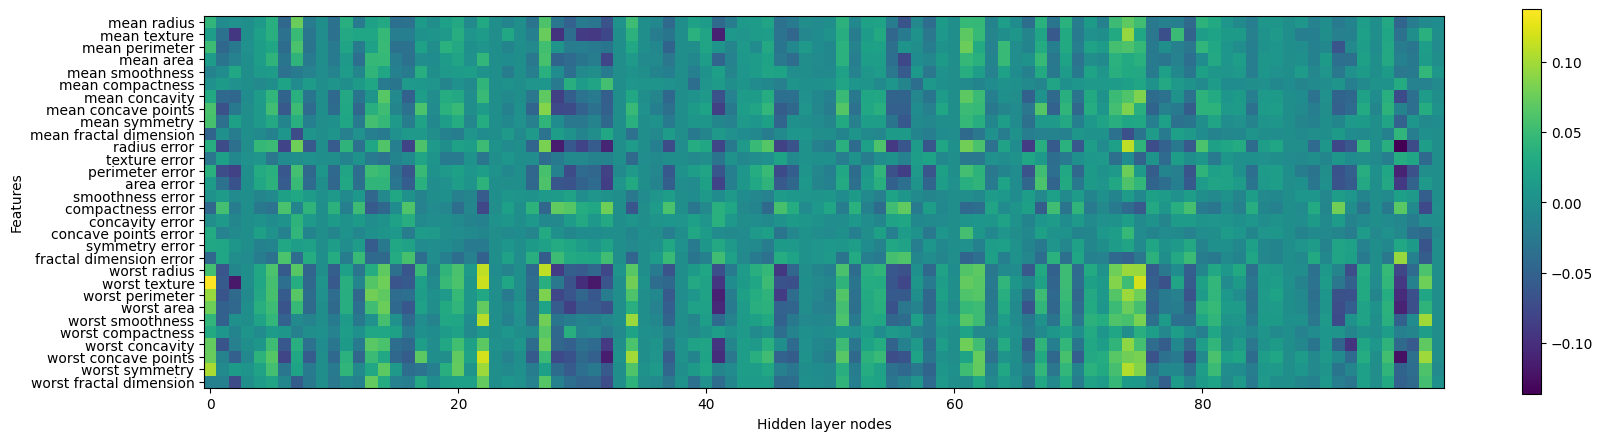

In [29]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(len(cancer['feature_names'])), cancer['feature_names'])
plt.xlabel('Hidden layer nodes')
plt.ylabel('Features')
plt.colorbar()